# Exploratory Data Analysis

### Importing libraries and define functions

In [1]:
import pandas as pd
import numpy as np
import scipy
import math
import os
import sys

In [2]:
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)
%config InlineBackend.figure_format = 'retina'

In [3]:
# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore" # Also affect subprocesses

In [4]:
import sklearn
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [5]:
from pycaret.regression import *

In [6]:
import functions as f

### Define dataset columns

In [7]:
df_columns = ['NP_type', 'Coating','core_size_nm','hydro_size_nm','Surf_charge_mV','Surface_area_m2_g',
               'shape','Dose_microg_mL','Duration_h','Cell_name','Cell_species','cell_Organ','Cell_morphology',
               'Cell_age','cell_type','sex','Assay','Test_indicator','Viability']

### Loading the input data into the data frame.

In [8]:
df = pd.read_csv("input/nano_dataset.txt", sep="\t", encoding="unicode_escape", usecols=df_columns)

In [9]:
data_df = f.canonicalize_dataset(df)

Does numeric columns have float64 pandas type? 

Duration_h: True
core_size_nm: True
hydro_size_nm: True
Surf_charge_mV: True
Surface_area_m2_g: True
Dose_microg_mL: True
Duration_h: True
Viability: True

Final column types: 

NP_type                object
Coating                object
core_size_nm          float64
hydro_size_nm         float64
Surf_charge_mV        float64
Surface_area_m2_g     float64
shape                  object
Dose_microg_mL        float64
Duration_h            float64
Cell_name              object
Cell_species           object
cell_Organ             object
Cell_morphology        object
Cell_age               object
cell_type              object
sex                    object
Assay                  object
Test_indicator         object
nanomaterial_group     object
Viability             float64
dtype: object

NP types that fall into the 'other' group:
['Au' 'Ag' 'Chitosan' 'Ni' 'PLGA' 'Polystyrene' 'SLN' 'Hydroxyapatite'
 'Mo' 'Alginate' 'Dendrimer' 'Liposomes' 'WO

In [10]:
data_df.shape

(11315, 20)

In [11]:
data_df.head(n=5)

,NP_type,Coating,core_size_nm,hydro_size_nm,Surf_charge_mV,Surface_area_m2_g,shape,Dose_microg_mL,Duration_h,Cell_name,Cell_species,cell_Organ,Cell_morphology,Cell_age,cell_type,sex,Assay,Test_indicator,nanomaterial_group,Viability
0,Au,None,39.0,NaN,NaN,NaN,Rod,0.3,24.0,143B,Human,Bone,Mixed,Adult,cancer,female,MTT,TetrazoliumSalt,other,84.99
1,Au,None,39.0,NaN,NaN,NaN,Rod,0.6,24.0,143B,Human,Bone,Mixed,Adult,cancer,female,MTT,TetrazoliumSalt,other,86.85
2,Au,None,39.0,NaN,NaN,NaN,Rod,1.2,24.0,143B,Human,Bone,Mixed,Adult,cancer,female,MTT,TetrazoliumSalt,other,85.48
3,Au,None,39.0,NaN,NaN,NaN,Rod,2.5,24.0,143B,Human,Bone,Mixed,Adult,cancer,female,MTT,TetrazoliumSalt,other,70.72
4,Au,None,39.0,NaN,NaN,NaN,Rod,5.0,24.0,143B,Human,Bone,Mixed,Adult,cancer,female,MTT,TetrazoliumSalt,other,54.09


### Describe dataframe

#### Describe numerical columns

In [12]:
data_df.describe()

,core_size_nm,hydro_size_nm,Surf_charge_mV,Surface_area_m2_g,Dose_microg_mL,Duration_h,Viability
count,10514.000000,2801.000000,5328.000000,848.000000,11098.000000,10979.000000,11315.000000
mean,56.336156,321.019086,-6.393037,100.875837,90.289711,34.225886,73.200165
std,93.643155,306.900955,28.948028,103.784463,533.261394,34.289437,32.085876
min,0.840000,8.700000,-158.000000,7.000000,0.000000,0.000000,-58.900000
25%,6.000000,120.000000,-26.960000,22.000000,0.010000,24.000000,52.270000
50%,21.550000,239.000000,-11.080000,57.000000,1.500000,24.000000,83.330000
75%,60.000000,404.000000,12.100000,177.570000,50.000000,48.000000,96.970000
max,900.000000,2029.000000,256.000000,576.230000,15000.000000,672.000000,404.810000


#### Describe categorical columns

In [14]:
data_df.describe(include=["bool", "object"])

,NP_type,Coating,shape,Cell_name,Cell_species,cell_Organ,Cell_morphology,Cell_age,cell_type,sex,Assay,Test_indicator,nanomaterial_group
count,11315,11315,4446,11315,11315,11315,11295,10566,11215,8292,11315,11073,11315
unique,79,151,13,285,22,65,37,5,2,2,34,17,5
top,CdSe,None,Sphere,A549,Human,Lung,Epithelial,Adult,cancer,male,MTT,TetrazoliumSalt,meta_oxide
freq,1662,7675,3298,921,8779,1975,5723,7786,6884,4884,4983,7382,4082


### Count missing values

In [36]:
print(data_df.isnull().sum())

NP_type                   0
Coating                   0
core_size_nm            801
hydro_size_nm          8514
Surf_charge_mV         5987
Surface_area_m2_g     10467
shape                  6869
Dose_microg_mL          217
Duration_h              336
Cell_name                 0
Cell_species              0
cell_Organ                0
Cell_morphology          20
Cell_age                749
cell_type               100
sex                    3023
Assay                     0
Test_indicator          242
nanomaterial_group        0
Viability                 0
dtype: int64


### Plot features (categorical and numerical)

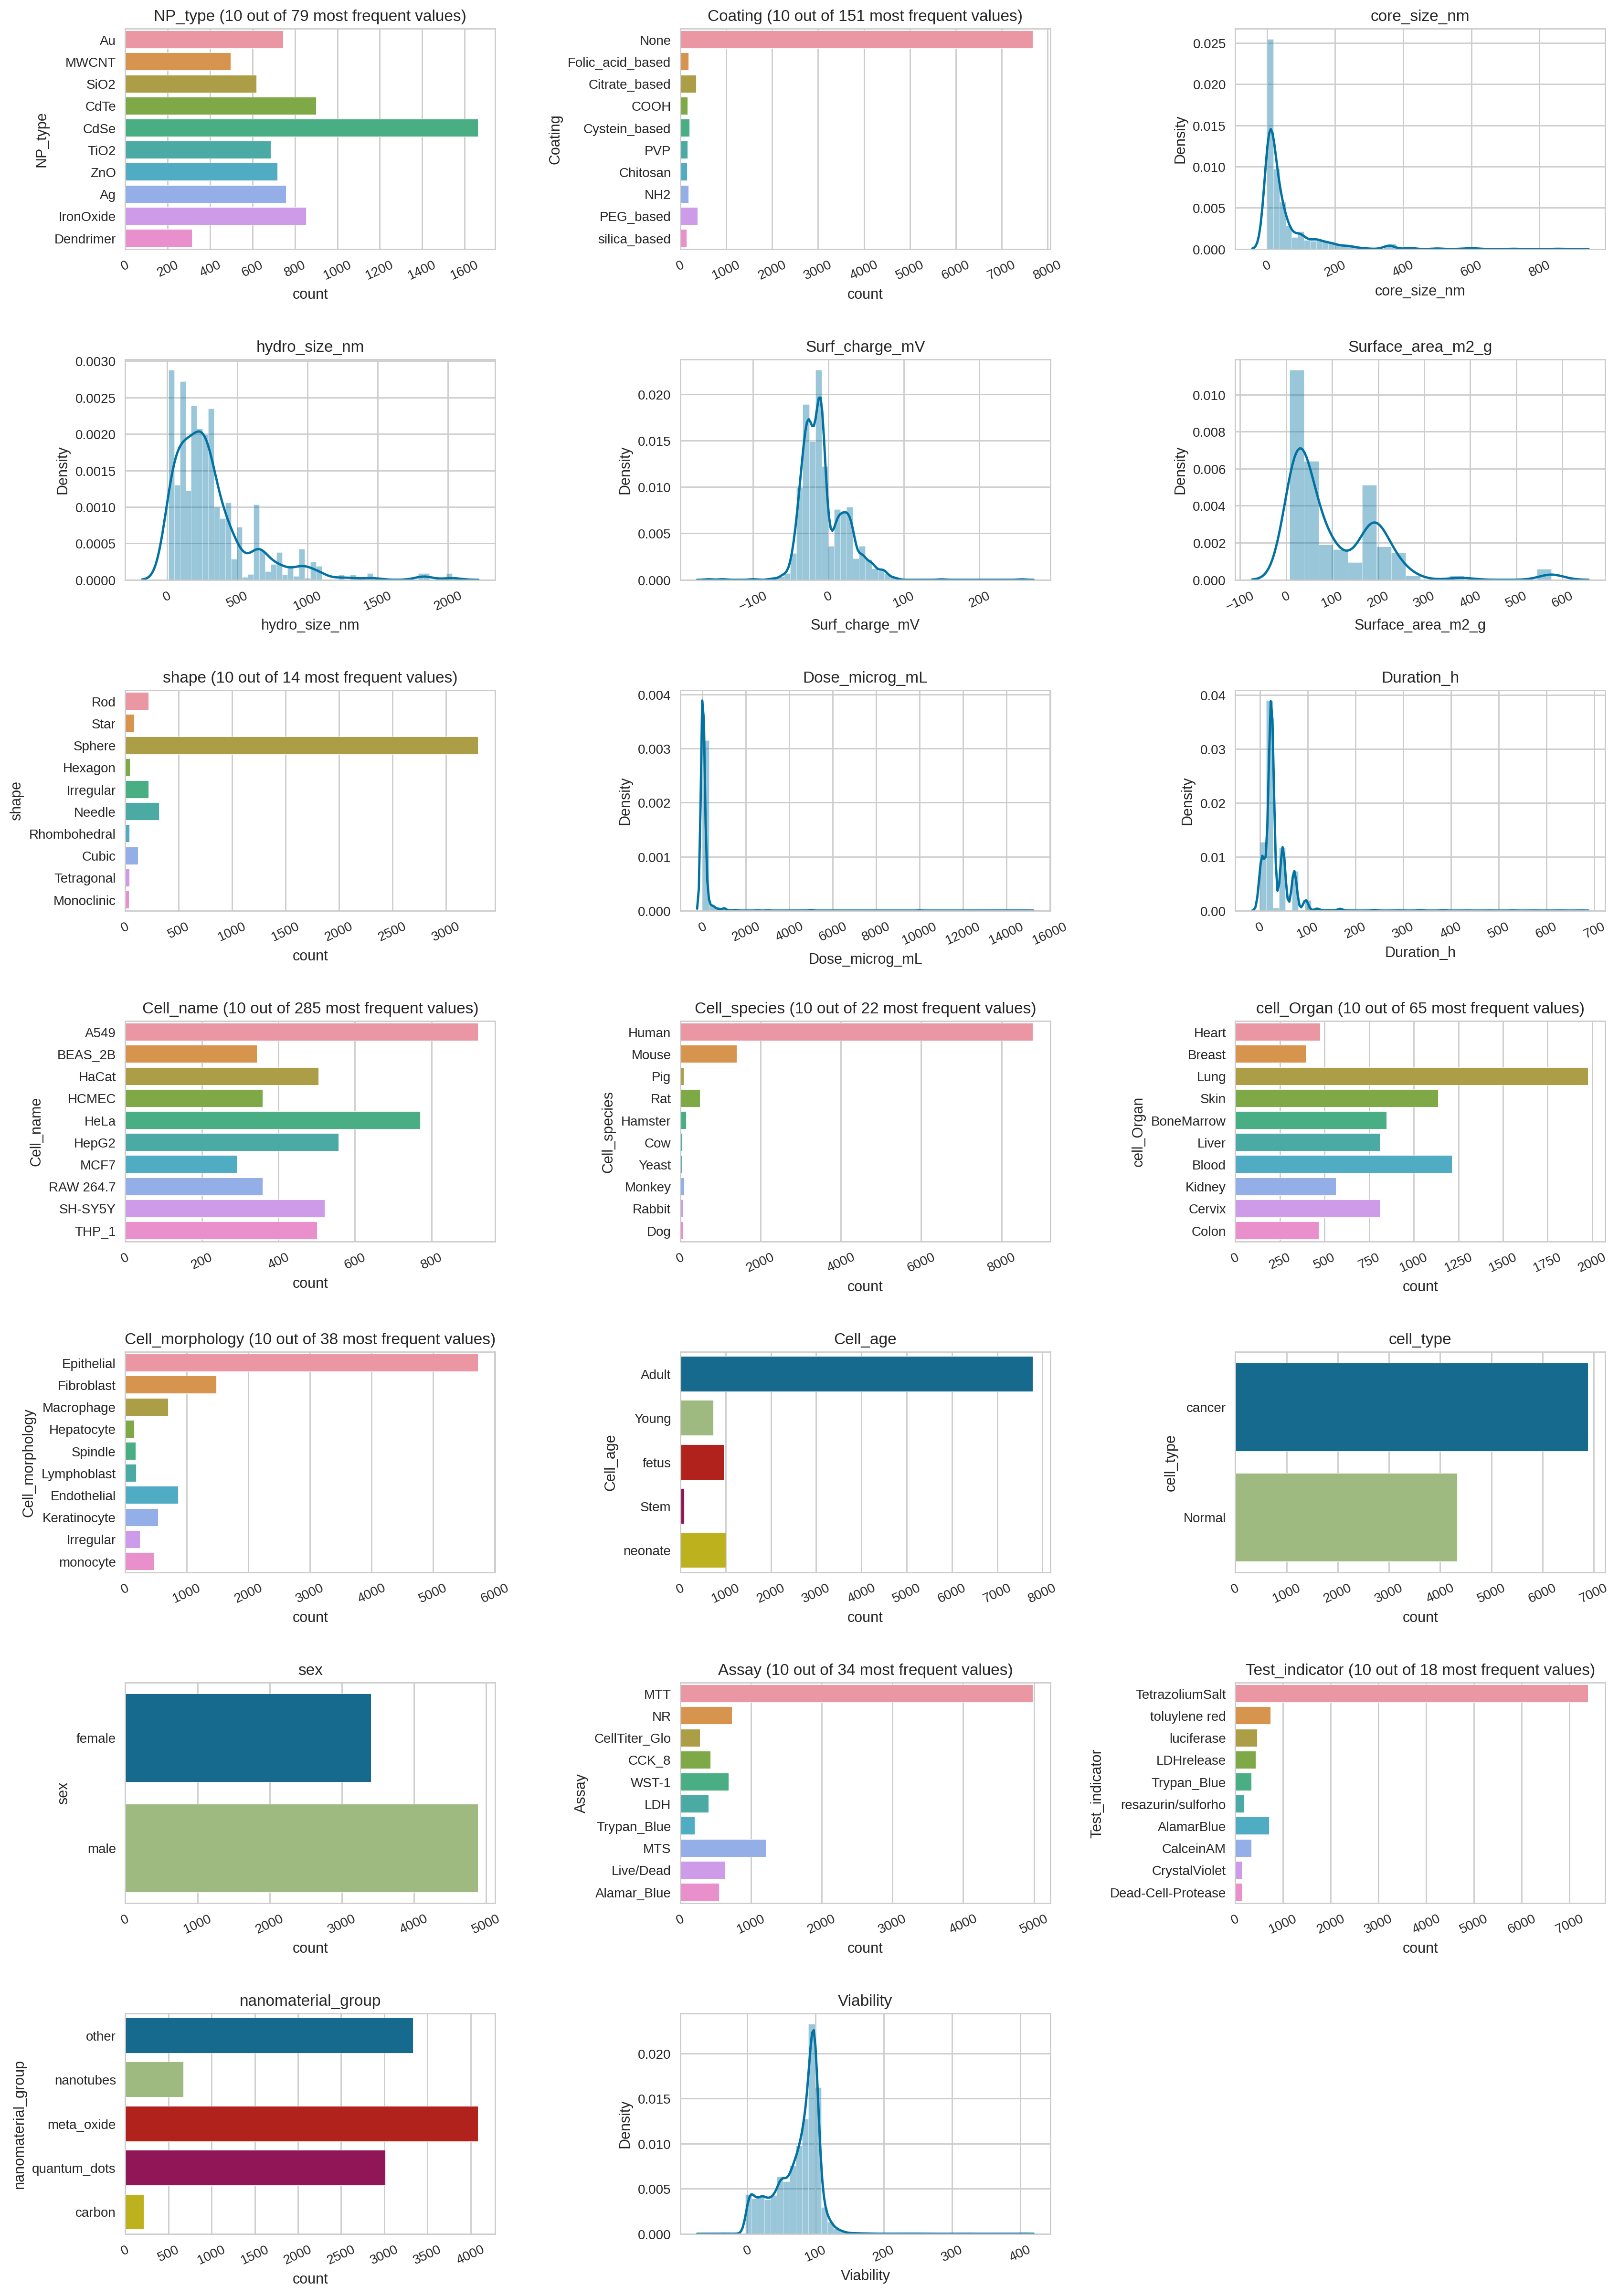

In [17]:
f.plot_distribution(data_df)

### Create training set and test set

In [12]:
data_df = f.quantile_discretize(data_df, 'Viability')

In [13]:
splitter = setup(data = data_df, target = 'Viability_discrete',
                 preprocess = False,
                 train_size=0.8,
                 data_split_stratify=True,
                 # don't change the following
                 session_id = 123,
                 use_gpu=False,
                 log_experiment = False,
                 silent=True,
                 experiment_name = 'splitter')

,Description,Value
0,session_id,123
1,Target,Viability_discrete
2,Original Data,"(11315, 21)"
3,Missing Values,True
4,Numeric Features,7
5,Categorical Features,13
6,Transformed Train Set,"(9052, 20)"
7,Transformed Test Set,"(2263, 20)"
8,Shuffle Train-Test,True
9,Stratify Train-Test,True


In [14]:
data_train_df = get_config(variable="X_train").copy()
#data_train_df['Viability'] = get_config(variable="y_train")

data_test_df = get_config(variable="X_test").copy()
#data_test_df['Viability'] = get_config(variable="y_test")

In [11]:
#data_train_df = pd.read_csv("output/datasets/universal/data_regression_train_df.csv", encoding="utf-8")
#data_test_df = pd.read_csv("output/datasets/universal/data_regression_test_df.csv", encoding="utf-8")

In [15]:
print(data_train_df.shape)
print(data_test_df.shape)

(9052, 20)
(2263, 20)


### Plot numerical variables distribution of train and test sets 

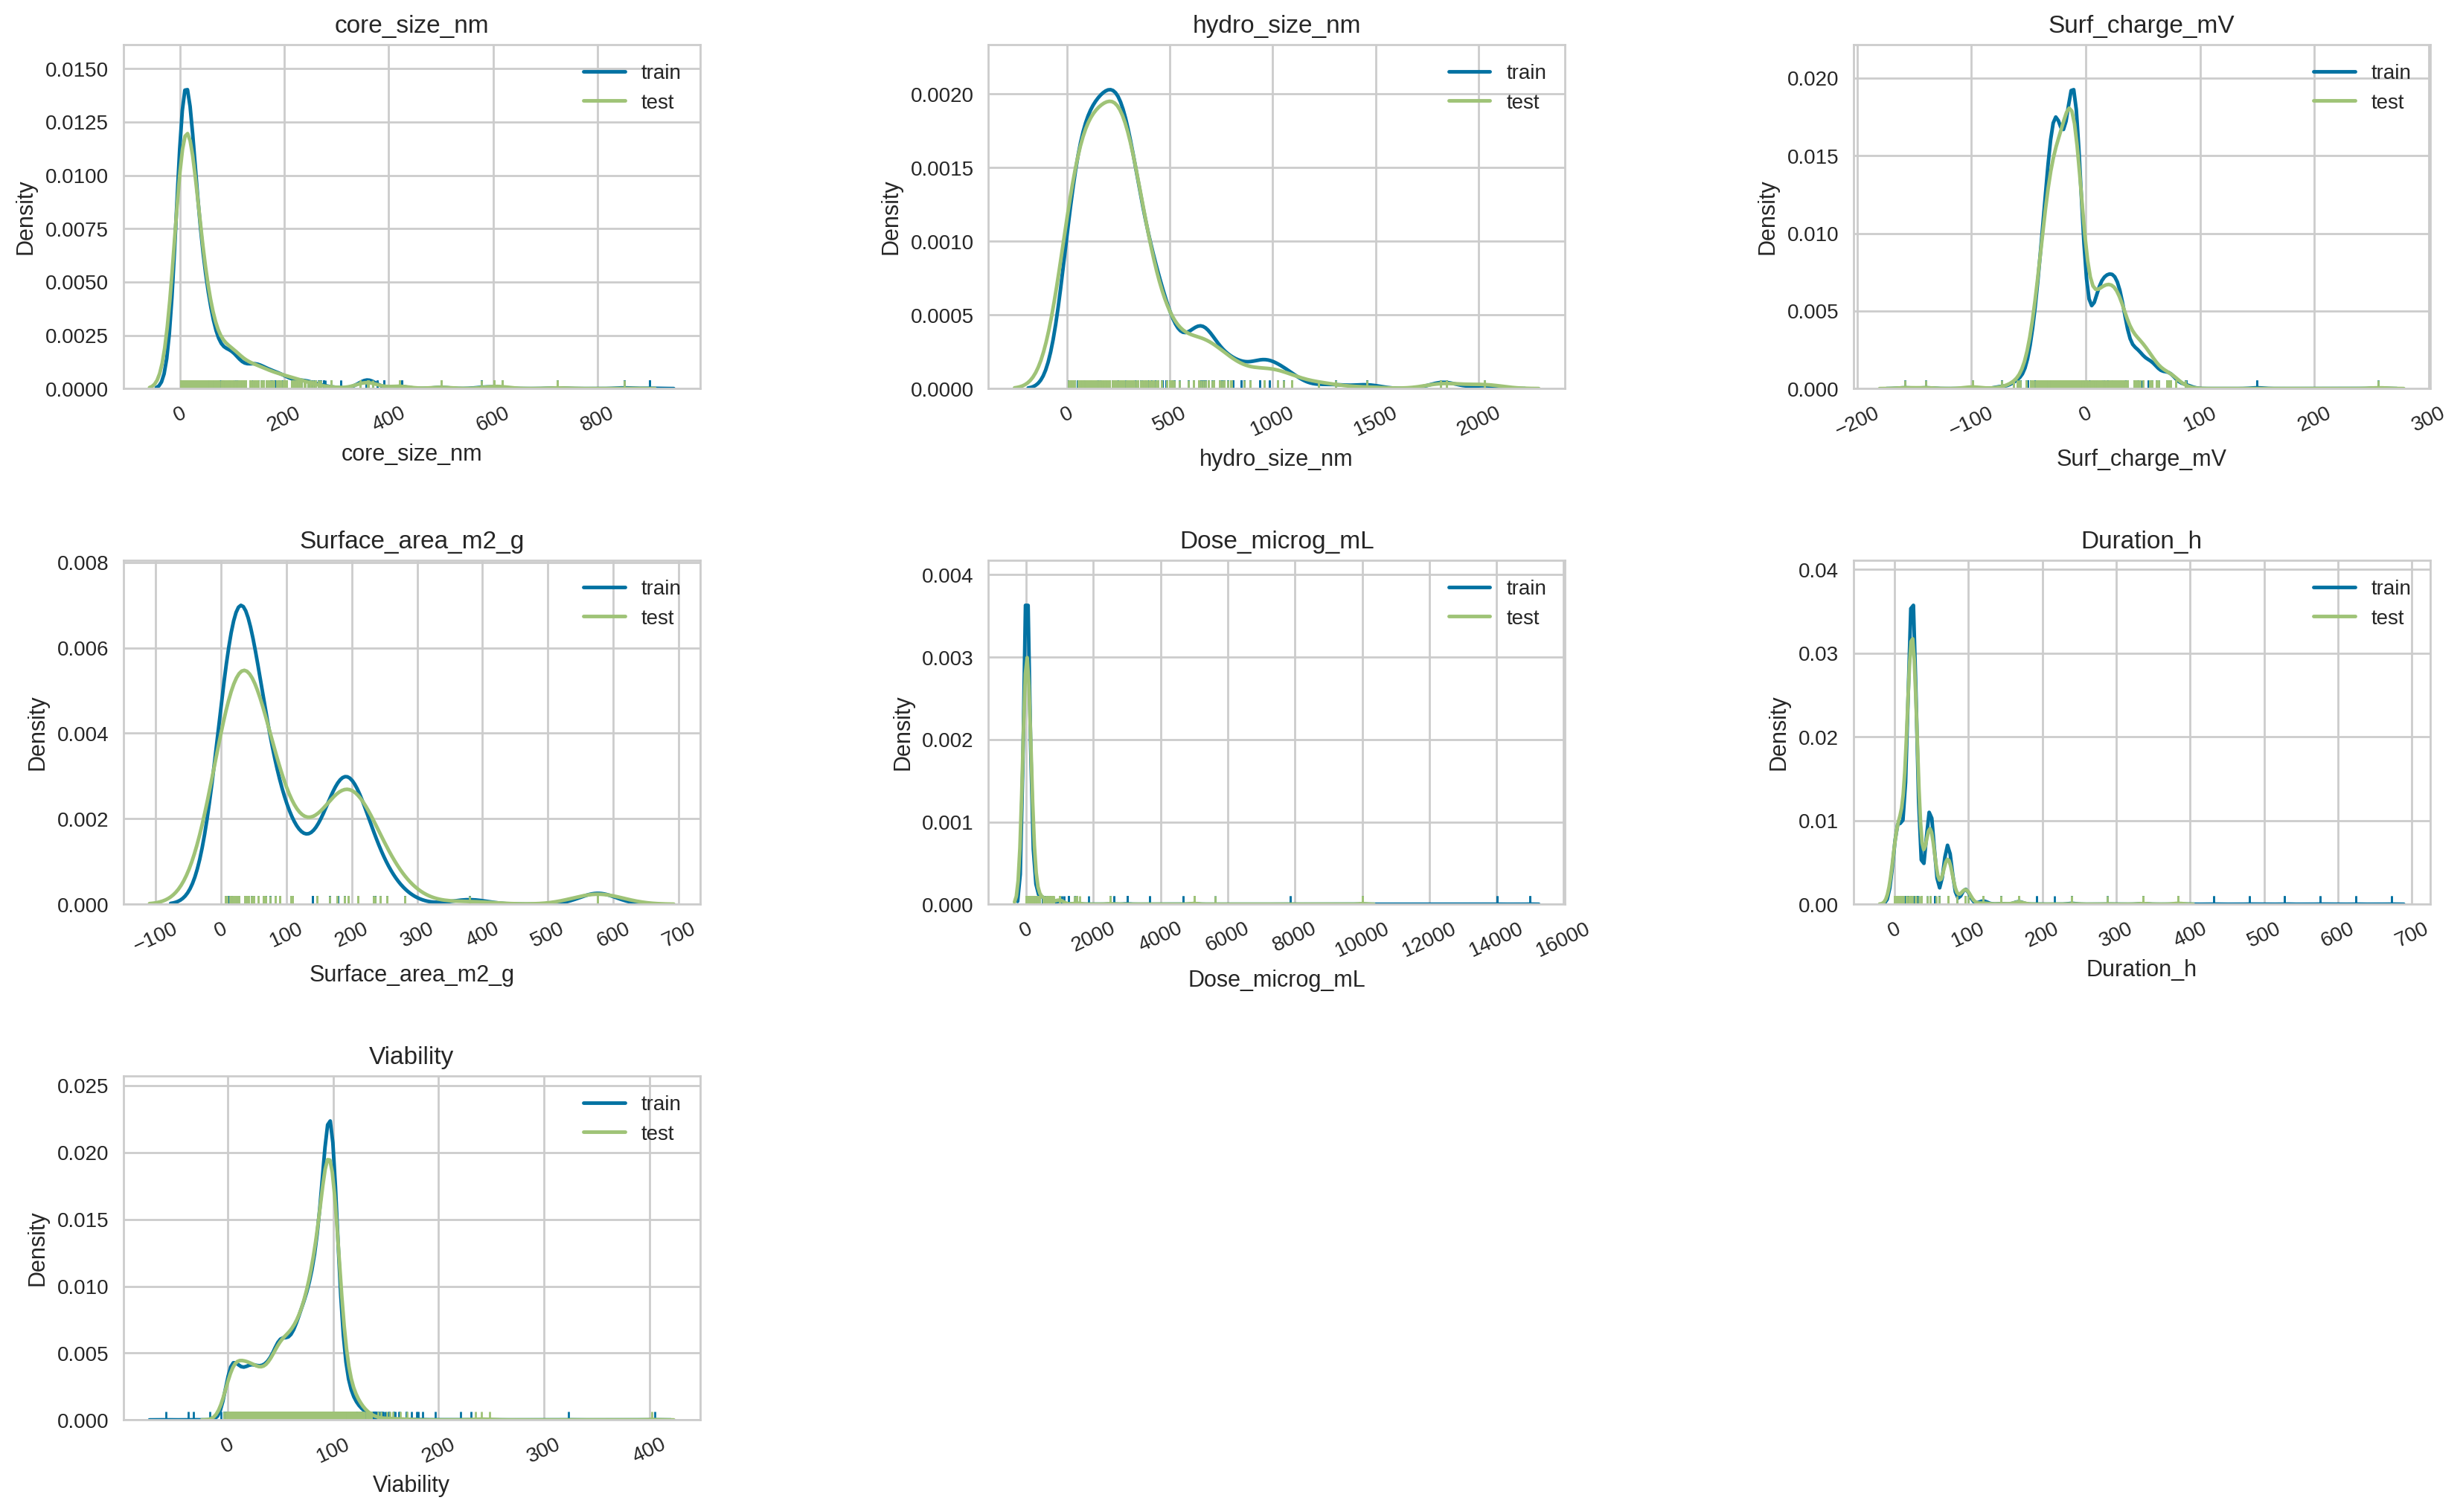

In [16]:
f.plot_distribution_train_test(data_train_df, data_test_df)

### Prepare classification datasets

In [17]:
data_df = data_df.drop('Viability_discrete',axis=1)

In [18]:
data_classification_df = f.convert_to_classification_dataset(data_df.copy())

In [19]:
data_classification_df.shape

(11315, 20)

In [20]:
splitter_classification = setup(data = data_classification_df, target = 'viability_class',
                             preprocess = False,
                             train_size=0.8,
                             data_split_stratify=True,
                             # don't change the following
                             session_id = 123,
                             use_gpu=False,
                             log_experiment = False,
                             silent=True,
                             experiment_name = 'splitter_classificiation')

,Description,Value
0,session_id,123
1,Target,viability_class
2,Original Data,"(11315, 20)"
3,Missing Values,True
4,Numeric Features,6
5,Categorical Features,13
6,Transformed Train Set,"(9052, 19)"
7,Transformed Test Set,"(2263, 19)"
8,Shuffle Train-Test,True
9,Stratify Train-Test,True


In [21]:
data_classification_train_df = get_config(variable="X_train").copy()
data_classification_train_df['viability_class'] = get_config(variable="y_train").copy()

data_classification_test_df = get_config(variable="X_test").copy()
data_classification_test_df['viability_class'] = get_config(variable="y_test").copy()

In [22]:
print(data_classification_train_df.shape)
print(data_classification_test_df.shape)

(9052, 20)
(2263, 20)


In [24]:
print(data_classification_train_df['viability_class'].value_counts())
print(data_classification_test_df['viability_class'].value_counts())

NonToxic    6990
Toxic       2062
Name: viability_class, dtype: int64
NonToxic    1747
Toxic        516
Name: viability_class, dtype: int64


### Save cleaned datasets

In [25]:
data_train_df.to_csv('output/datasets/universal/data_regression_train_df.csv', encoding='utf-8', index=False)

In [26]:
data_test_df.to_csv('output/datasets/universal/data_regression_test_df.csv', encoding='utf-8', index=False)

In [27]:
data_classification_train_df.to_csv('output/datasets/universal/data_classification_train_df.csv', encoding='utf-8', index=False)

In [28]:
data_classification_test_df.to_csv('output/datasets/universal/data_classification_test_df.csv', encoding='utf-8', index=False)

### Read cleaned datasets

In [7]:
data_train_df = pd.read_csv('output/datasets/universal/data_regression_train_df.csv', encoding='utf-8')

# PyCaret

In [29]:
os.environ["GIT_PYTHON_REFRESH"] = "quiet"

## Define data preprocessing scenarios

In [8]:
features_scenarios = list()

scenario1 = {}
scenario1["ID"] = 1
scenario1["ignore_features"] = ["NP_type", "Coating", "Cell_name"]
scenario1["high_cardinality_features"] = ["cell_Organ", "Cell_morphology", "Assay"]
scenario1["bin_numeric_features"] = ["Duration_h", "Dose_microg_mL"]

scenario2 = {}
scenario2["ID"] = 2
scenario2["ignore_features"] = ["NP_type", "Coating", "Cell_name"]
scenario2["high_cardinality_features"] = None
scenario2["bin_numeric_features"] = ["Duration_h", "Dose_microg_mL"]

scenario3 = {}
scenario3["ID"] = 3
scenario3["ignore_features"] = ["NP_type", "Coating", "Cell_name"]
scenario3["high_cardinality_features"] = ["cell_Organ", "Cell_morphology", "Assay"]
scenario3["bin_numeric_features"] = None

scenario4 = {}
scenario4["ID"] = 4
scenario4["ignore_features"] = ["NP_type", "Coating", "Cell_name"]
scenario4["high_cardinality_features"] = None
scenario4["bin_numeric_features"] = None

scenario5 = {}
scenario5["ID"] = 5
scenario5["ignore_features"] = ["nanomaterial_group", "Coating", "Cell_name"]
scenario5["high_cardinality_features"] = ["cell_Organ", "Cell_morphology", "Assay"]
scenario5["bin_numeric_features"] = ["Duration_h", "Dose_microg_mL"]

scenario6 = {}
scenario6["ID"] = 6
scenario6["ignore_features"] = ["nanomaterial_group", "Coating", "Cell_name"]
scenario6["high_cardinality_features"] = None
scenario6["bin_numeric_features"] = ["Duration_h", "Dose_microg_mL"]

scenario7 = {}
scenario7["ID"] = 7
scenario7["ignore_features"] = ["nanomaterial_group", "Coating", "Cell_name"]
scenario7["high_cardinality_features"] = ["cell_Organ", "Cell_morphology", "Assay"]
scenario7["bin_numeric_features"] = None

scenario8 = {}
scenario8["ID"] = 8
scenario8["ignore_features"] = ["nanomaterial_group", "Coating", "Cell_name"]
scenario8["high_cardinality_features"] = None
scenario8["bin_numeric_features"] = None

features_scenarios.append(scenario1)
features_scenarios.append(scenario2)
features_scenarios.append(scenario3)
features_scenarios.append(scenario4)
features_scenarios.append(scenario5)
features_scenarios.append(scenario6)
features_scenarios.append(scenario7)
features_scenarios.append(scenario8)


imputation_scenarios = list()

scenario1 = {}
scenario1["ID"] = 1
scenario1["imputation_type"] = "simple"
scenario1["numeric_imputation"] = "median"

scenario2 = {}
scenario2["ID"] = 2
scenario2["imputation_type"] = "simple"
scenario2["numeric_imputation"] = "mean"

scenario3 = {}
scenario3["ID"] = 3
scenario3["imputation_type"] = "iterative"
scenario3["numeric_imputation"] = "mean"

imputation_scenarios.append(scenario1)
imputation_scenarios.append(scenario2)
imputation_scenarios.append(scenario3)



preprocess_scenarios = list()

scenario1 = {}
scenario1["ID"] = 1
scenario1["normalize"] = True
scenario1["remove_outliers"] = True

scenario2 = {}
scenario2["ID"] = 2
scenario2["normalize"] = True
scenario2["remove_outliers"] = False

scenario3 = {}
scenario3["ID"] = 3
scenario3["normalize"] = False
scenario3["remove_outliers"] = True

scenario4 = {}
scenario4["ID"] = 4
scenario4["normalize"] = False
scenario4["remove_outliers"] = False

preprocess_scenarios.append(scenario1)
preprocess_scenarios.append(scenario2)
preprocess_scenarios.append(scenario3)
preprocess_scenarios.append(scenario4)

In [9]:
data_train_df.columns

Index(['NP_type', 'Coating', 'core_size_nm', 'hydro_size_nm', 'Surf_charge_mV',
       'Surface_area_m2_g', 'shape', 'Dose_microg_mL', 'Duration_h',
       'Cell_name', 'Cell_species', 'cell_Organ', 'Cell_morphology',
       'Cell_age', 'cell_type', 'sex', 'Assay', 'Test_indicator',
       'nanomaterial_group', 'Viability'],
      dtype='object')

## Run PyCaret for all the scenarios 96 in total (8 X 3 X 4)

In [10]:
seed = 834

In [11]:
y = data_train_df.copy()[['Viability']]
X = data_train_df.drop('Viability', axis=1).copy()

In [12]:
data_prepr_train_X, data_prepr_test_X, data_prepr_train_y, data_prepr_test_y = train_test_split(X, y, test_size=0.2, random_state=seed)

In [13]:
data_prepr_train_X = data_prepr_train_X.reset_index(drop=True)
data_prepr_test_X = data_prepr_test_X.reset_index(drop=True)
data_prepr_train_y = data_prepr_train_y.reset_index(drop=True)
data_prepr_test_y = data_prepr_test_y.reset_index(drop=True)

In [14]:
data_prepr_train = pd.concat([data_prepr_train_X, data_prepr_train_y], axis=1)

In [15]:
data_prepr_train.shape

(7241, 20)

In [16]:
data_prepr_test = pd.concat([data_prepr_test_X, data_prepr_test_y], axis=1)

In [17]:
data_prepr_test.shape

(1811, 20)

In [18]:
data_prepr_train.to_csv('output/datasets/universal/data_preprocessing_train_df.csv', encoding='utf-8', index=False)
data_prepr_test.to_csv('output/datasets/universal/data_preprocessing_test_df.csv', encoding='utf-8', index=False)

In [19]:
i = 0
j = 0
k = 0

for features_scenario in features_scenarios:
    i = features_scenario["ID"] 
    for imputation_scenario in imputation_scenarios:
        j = imputation_scenario["ID"]
        for preprocess_scenario in preprocess_scenarios:
            k = preprocess_scenario["ID"]
                                
            print(imputation_scenario["imputation_type"])
            print(imputation_scenario["numeric_imputation"])
            print(features_scenario["ignore_features"])
            print(features_scenario["bin_numeric_features"])
            print(features_scenario["high_cardinality_features"])
            print(preprocess_scenario["normalize"])
            print(preprocess_scenario["remove_outliers"])

            stup = setup(data = data_prepr_train, target = 'Viability', 
                test_data = data_prepr_test,
                imputation_type = imputation_scenario["imputation_type"], #default
                numeric_imputation = imputation_scenario["numeric_imputation"], #default: mean

                categorical_imputation = "constant", #default: constant
                iterative_imputation_iters = 5, #default: 5
                numeric_iterative_imputer = "lightgbm",
                categorical_iterative_imputer = "lightgbm",

                ignore_features = features_scenario["ignore_features"],
                bin_numeric_features = features_scenario["bin_numeric_features"],
                high_cardinality_features = features_scenario["high_cardinality_features"],

                high_cardinality_method = "frequency", #default: frequency
                handle_unknown_categorical = True, #default
                unknown_categorical_method = "least_frequent", #default

                normalize = preprocess_scenario["normalize"], #default: False
                remove_outliers= preprocess_scenario["remove_outliers"], #default: False

                outliers_threshold = 0.05, #default

                transformation= False, #default
                transformation_method = 'yeo-johnson', #default
                transform_target = False, 
                combine_rare_levels = False,
                rare_level_threshold = 0.1, #default: 0.1

                remove_multicollinearity = False, #default 
                multicollinearity_threshold = 0.9, #default

                ignore_low_variance = True, 

                feature_interaction = False, 
                feature_ratio = False,
                polynomial_features = False, 
                trigonometry_features = False,

                train_size=0.95,
                
                # don't change the following
                session_id = seed,
                use_gpu=False,
                log_experiment = False,
                silent=True,
                experiment_name = 'nanosafety')
            
            set_config('seed', seed)

            best = compare_models(include = ['lr', 'lasso', 'ridge', 'svm', 'rf', 'et', 'lightgbm', 'gbr'], 
                                  n_select = 3, 
                                  cross_validation=False)

            results_df = pull()

            results_df = results_df.reset_index(level=0)

            results_df.to_csv("output/preprocessing_scenarios/" + "-".join([str(i), str(j), str(k)])+".tsv", 
                                                         index=False, encoding="utf-8", sep="\t")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,13.8548,405.5776,20.1390,0.6040,0.6248,1.7542,1.6400
rf,Random Forest Regressor,15.6572,473.4721,21.7594,0.5377,0.6962,2.7049,1.4500
lightgbm,Light Gradient Boosting Machine,17.3582,531.9203,23.0634,0.4806,0.7493,3.0016,0.2100
gbr,Gradient Boosting Regressor,20.8237,686.6692,26.2044,0.3295,0.8151,3.1701,1.8500
ridge,Ridge Regression,22.0595,775.1945,27.8423,0.2431,0.8317,3.1419,0.0200
lr,Linear Regression,22.0700,777.2384,27.8790,0.2411,0.8309,3.1021,0.0400
lasso,Lasso Regression,25.4436,989.6519,31.4587,0.0337,0.9053,4.3642,0.0200
svm,Support Vector Regression,24.2789,1077.9543,32.8322,-0.0526,0.9341,4.6291,16.4400


## Aggregate preprocessing scenarios model comparison results from 96 experiments

In [20]:
results_list = os.listdir("output/preprocessing_scenarios")

In [21]:
os.path.splitext(os.path.basename("output/preprocessing_scenarios/"+results_list[0]))[0]

'1-1-1'

In [22]:
li = []

for result_file in results_list:
    
    scenario = os.path.splitext(os.path.basename("output/preprocessing_scenarios/"+result_file))[0]
    df = pd.read_csv("output/preprocessing_scenarios/"+result_file, encoding="utf-8", index_col=None, header=0, sep="\t")
    df['scenario'] = scenario
    li.append(df)

In [23]:
final_df = pd.concat(li, axis=0, ignore_index=True)
final_df = final_df.reset_index(drop=True)

print(final_df.shape)

(768, 10)


In [24]:
final_df.dtypes

index        object
Model        object
MAE         float64
MSE         float64
RMSE        float64
R2          float64
RMSLE       float64
MAPE        float64
TT (Sec)    float64
scenario     object
dtype: object

In [25]:
final_df.head()

,index,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec),scenario
0,rf,Random Forest Regressor,17.7293,605.1885,24.6006,0.4091,0.6754,1.6159,0.66,1-1-1
1,lightgbm,Light Gradient Boosting Machine,19.1903,637.1440,25.2417,0.3779,0.7195,1.8657,0.17,1-1-1
2,et,Extra Trees Regressor,17.9613,664.7074,25.7819,0.3510,0.6941,1.3765,0.52,1-1-1
3,gbr,Gradient Boosting Regressor,21.9453,756.7708,27.5095,0.2611,0.7976,2.4790,0.59,1-1-1
4,ridge,Ridge Regression,24.8749,949.5374,30.8146,0.0728,0.8806,3.6369,0.02,1-1-1


In [26]:
final_df = final_df.sort_values(by=['R2'], ascending=False)

In [27]:
final_df.head(n=20)

,index,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec),scenario
680,rf,Random Forest Regressor,13.3916,389.8178,19.7438,0.6194,0.5400,0.9661,1.27,8-1-2
584,rf,Random Forest Regressor,13.4894,391.2532,19.7801,0.6180,0.5472,0.9658,0.93,7-1-2
696,rf,Random Forest Regressor,13.4403,391.7160,19.7918,0.6175,0.5410,0.9769,1.27,8-1-4
600,rf,Random Forest Regressor,13.5023,391.8058,19.7941,0.6174,0.5473,0.9659,0.94,7-1-4
712,rf,Random Forest Regressor,13.4127,393.3439,19.8329,0.6159,0.5404,0.9626,1.37,8-2-2
616,rf,Random Forest Regressor,13.5371,394.5286,19.8627,0.6148,0.5483,0.9854,0.96,7-2-2
728,rf,Random Forest Regressor,13.4231,394.6102,19.8648,0.6147,0.5403,0.9705,1.29,8-2-4
632,rf,Random Forest Regressor,13.5551,395.0621,19.8762,0.6142,0.5484,0.9856,0.95,7-2-4
752,et,Extra Trees Regressor,13.6560,398.9678,19.9742,0.6104,0.5486,0.8636,1.23,8-3-3
760,et,Extra Trees Regressor,13.8548,405.5776,20.1390,0.6040,0.6248,1.7542,1.64,8-3-4


# Best scenario [8 , 1, 2]

#### Print the best scenario from the previous table which is: 8-1-2

In [28]:
best_scenario = [8 , 1, 2]

In [29]:
sc_ignore_features = features_scenarios[best_scenario[0]-1]["ignore_features"]
sc_bin_numeric_features = features_scenarios[best_scenario[0]-1]["bin_numeric_features"]
sc_high_cardinality_features = features_scenarios[best_scenario[0]-1]["high_cardinality_features"]

print("Ignored features: " + str(sc_ignore_features))
print("Binned numeric features: " + str(sc_bin_numeric_features))
print("High cardinality features: "+ str(sc_high_cardinality_features))


sc_imputation_type = imputation_scenarios[best_scenario[1]-1]["imputation_type"]
sc_numeric_imputation = imputation_scenarios[best_scenario[1]-1]["numeric_imputation"]

print("Imputation type: " + str(sc_imputation_type))
print("Numeric imputation method: " + str(sc_numeric_imputation))

sc_normalize = preprocess_scenarios[best_scenario[2]-1]["normalize"]
sc_remove_outliers = preprocess_scenarios[best_scenario[2]-1]["remove_outliers"]

print("Normalization: " + str(sc_normalize))
print("Remove outliers: " + str(sc_remove_outliers))

Ignored features: ['nanomaterial_group', 'Coating', 'Cell_name']
Binned numeric features: None
High cardinality features: None
Imputation type: simple
Numeric imputation method: median
Normalization: True
Remove outliers: False
